<a href="https://colab.research.google.com/github/INLANA01/capstone_project_coref_with_transformers/blob/main/Gap_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import spacy
from spacy.symbols import PROPN, PERSON
from __future__ import unicode_literals, print_function
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import defaultdict
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
train = pd.read_csv('gap-development.tsv', sep='\t')
valid = pd.read_csv('gap-validation.tsv', sep='\t')
test = pd.read_csv('gap-test.tsv', sep='\t')

In [ ]:
train.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,True,Pauline,207,False,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,True,Bernard Leach,251,False,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,False,De la Sota,246,True,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,False,Henry Rosenthal,336,True,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,False,Rivera,294,True,http://en.wikipedia.org/wiki/Jessica_Rivera


In [ ]:
print(train.iloc[0]['Text'])

Zoe Telford -- played the police officer girlfriend of Simon, Maggie. Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again. Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline.


## Get Names

In [ ]:
def GetNamesandFreq(dataset):
    def preprocess(sent):
        sent = nltk.word_tokenize(sent)
        sent = nltk.pos_tag(sent)
        return sent
    names = defaultdict(int)
    for row in range(len(dataset)):
        for name, typ in preprocess(dataset.iloc[row]['Text']):
            if typ == 'NNP' and name != 'New':
                names[name] += 1
    freq = defaultdict(list)
    for k, v in names.items():
        freq[v].append(k)
    keys = list(freq.keys())
    keys.sort()
    vals = []
    for key in keys:
        vals.append(len(freq[key]))
    return freq, keys, vals, names

In [ ]:
frequency_dictionary_train, frequency_of_names_train, quantity_of_names_train, names_train = GetNamesandFreq(train)
frequency_dictionary_validation, frequency_of_names_validation, quantity_of_names_validation, names_validation = GetNamesandFreq(valid)
frequency_dictionary_test, frequency_of_names_test, quantity_of_names_test, names_test = GetNamesandFreq(test)

## Frequency Spectrum of names

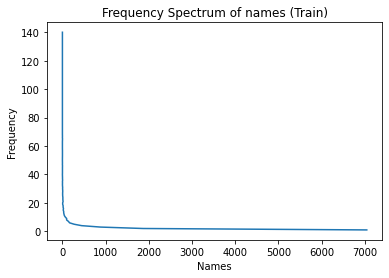

In [ ]:
plt.ylabel('Frequency')
plt.xlabel('Names')
plt.title('Frequency Spectrum of names (Train)')
plt.plot(quantity_of_names_train, frequency_of_names_train)


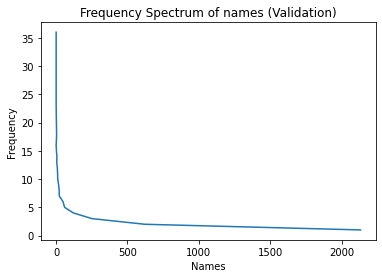

In [ ]:
plt.ylabel('Frequency')
plt.xlabel('Names')
plt.title('Frequency Spectrum of names (Validation)')
plt.plot(quantity_of_names_validation, frequency_of_names_validation)


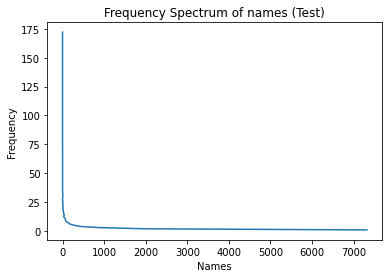

In [ ]:
plt.ylabel('Frequency')
plt.xlabel('Names')
plt.title('Frequency Spectrum of names (Test)')
plt.plot(quantity_of_names_test, frequency_of_names_test)


## Most frequent names

### Train Dataset

In [ ]:
print("The most frequent name was {} it occured {} times in this set.".format(frequency_dictionary_train[frequency_of_names_train[-1]][0], names_train[frequency_dictionary_train[frequency_of_names_train[-1]][0]]))

The most frequent name was John it occured 140 times in this set.


### Validation Dataset

In [ ]:
print("The most frequent name was {} it occured {} times in this set.".format(frequency_dictionary_validation[frequency_of_names_validation[-1]][0], names_validation[frequency_dictionary_validation[frequency_of_names_validation[-1]][0]]))

The most frequent name was John it occured 36 times in this set.


### Test Dataset

In [ ]:
print("The most frequent name was {} it occured {} times in this set.".format(frequency_dictionary_test[frequency_of_names_test[-1]][0], names_test[frequency_dictionary_test[frequency_of_names_test[-1]][0]]))

The most frequent name was John it occured 172 times in this set.


In [ ]:
## Least Frequent Names

##Other Frequent Names

### Train Dataset

In [ ]:
for i in range(2, 11):
    for name in frequency_dictionary_train[frequency_of_names_train[-i]]:
        print("{} : {} times".format(name, names_train[name]))

York : 97 times
William : 91 times
University : 89 times
Mary : 86 times
World : 85 times
May : 79 times
August : 74 times
George : 73 times
Paul : 72 times


### Validation Dataset

In [ ]:
for i in range(2, 11):
    for name in frequency_dictionary_validation[frequency_of_names_validation[-i]]:
        print("{} : {} times".format(name, names_validation[name]))

Elizabeth : 32 times
Mary : 27 times
Michael : 24 times
York : 23 times
King : 21 times
George : 21 times
Peter : 18 times
James : 18 times
David : 18 times
Charles : 18 times
London : 17 times
Sir : 17 times
II : 17 times
Joe : 16 times
Jim : 15 times
William : 15 times
Sarah : 15 times


### Test Dataset

In [ ]:
for i in range(2, 11):
    for name in frequency_dictionary_test[frequency_of_names_test[-i]]:
        print("{} : {} times".format(name, names_train[name]))

York : 97 times
University : 89 times
World : 85 times
William : 91 times
July : 58 times
James : 67 times
October : 43 times
January : 65 times
December : 50 times
United : 65 times
May : 79 times


##Least Frequent Names

### Train Dataset

In [ ]:
print("Some of the Least frequent names were: \n {}, etc. \n that occured {} times".format(', '.join(frequency_dictionary_train[frequency_of_names_train[0]][:20]), frequency_of_names_train[0]))

Some of the Least frequent names were: 
 Phoebe, Evanston, Peppy, Trier, Winnetka, Leach, Shoji, Hamada, Kanjiro, Kawai, Angeloz, Justicialist, Menem, Viewers, Humming, Came, Rank, Nuria, Golijov, Ainadamar, etc. 
 that occured 1 times


### Validation Dataset

In [ ]:
print("Some of the Least frequent names were: \n {}, etc. \n that occured {} times".format(', '.join(frequency_dictionary_validation[frequency_of_names_validation[0]][:20]), frequency_of_names_validation[0]))

Some of the Least frequent names were: 
 ZTE, Speaker, Abalos, NBN, Nott, Camberwell, Brixton, Datchelor, Kaleo, Five-0, Fryer, Asner, Election, Speedos, Sorry, Lovell, Nairobi, Skeptic, Dictionary, Randi, etc. 
 that occured 1 times


### Test Dataset

In [ ]:
print("Some of the Least frequent names were: \n {}, etc. \n that occured {} times".format(', '.join(frequency_dictionary_test[frequency_of_names_test[0]][:20]), frequency_of_names_test[0]))

Some of the Least frequent names were: 
 Kontinental, Finland, Wolfsburg, NHLer, Olympic-medalist, Alonso-, Luque, Carrasco-, Ram*n, Copa, Libertadores, Nacional, Alfredo, St*fano, Vieta, Kamel, Hussien, Saddam, Iraqi, Signor, etc. 
 that occured 1 times


## Data Set Summary

In [ ]:
def text_len(dataset):
    dataset['text_length'] = dataset.Text.str.len()

In [ ]:
def column_summary(dataset, target_column, dataset_name):
    summary = pd.DataFrame(dataset[target_column].describe()).round(2)
    summary.columns = [dataset_name]
    return summary

In [ ]:
text_len(train)
text_len(valid)
text_len(test)

### Number of Instances in Train, Validation and Test Set

In [ ]:
df_train = column_summary(train, 'text_length', 'Train')
df_test = column_summary(test, 'text_length', 'Test')
df_valid = column_summary(valid, 'text_length', 'Validation')
text_length_summary = pd.concat([df_train, df_valid, df_test], axis=1)
print(text_length_summary)

         Train  Validation     Test
count  2000.00      454.00  2000.00
mean    426.92      426.39   430.61
std     124.63      112.64   130.72
min     104.00      147.00    69.00
25%     346.00      354.00   344.00
50%     410.00      408.50   412.00
75%     493.00      487.75   500.00
max    1270.00     1012.00  1347.00


## Number and Percent of Pronouns

In [ ]:
def column_value_counts(dataset, target_column, dataset_name):
    df_value_counts = dataset[target_column].value_counts()
    dataset = pd.DataFrame(df_value_counts)
    dataset.columns = [dataset_name]
    dataset[dataset_name+' %'] = 100*dataset[dataset_name] / dataset[dataset_name].sum()
    return dataset

## Number and Percentages of Target Pronouns

In [ ]:
df_train = column_value_counts(train, 'Pronoun', 'Train')
df_test = column_value_counts(test, 'Pronoun', 'Test')
df_valid = column_value_counts(valid, 'Pronoun', 'Validation')

pronoun_count = pd.concat([df_train, df_valid, df_test], axis=1)
pronoun_count = pronoun_count.round(2)
print(pronoun_count.sort_values(by=['Train'], ascending=False))


      Train  Train %  Validation  Validation %  Test  Test %
her   534.0    26.70       132.0         29.07   566   28.30
his   496.0    24.80       102.0         22.47   528   26.40
she   249.0    12.45        62.0         13.66   237   11.85
he    235.0    11.75        67.0         14.76   221   11.05
She   179.0     8.95        25.0          5.51   159    7.95
He    138.0     6.90        26.0          5.73   127    6.35
him    98.0     4.90        26.0          5.73    96    4.80
Her    38.0     1.90         8.0          1.76    37    1.85
His    33.0     1.65         6.0          1.32    28    1.40
hers    NaN      NaN         NaN           NaN     1    0.05


In [ ]:
def GetPronounsandFreq(dataset):
    def preprocess(sent):
        sent = nltk.word_tokenize(sent)
        sent = nltk.pos_tag(sent)
        return sent
    pronouns  = defaultdict(int)
    for row in range(len(dataset)):
        for pronoun, typ in preprocess(dataset.iloc[row]['Text']):
            if typ == 'PRP$':
                pronouns[pronoun] += 1
    freq = defaultdict(list)
    for k, v in pronouns.items():
        freq[v].append(k)
    keys = list(freq.keys())
    keys.sort()
    vals = []
    for key in keys:
        vals.append(len(freq[key]))
    return freq, keys, vals, pronouns

In [ ]:
frequency_dictionary_pronoun_train, frequency_of_pronounss_train, quantity_of_pronounss_train, pronouns_train = GetPronounsandFreq(train)
frequency_dictionary_pronoun_validation, frequency_of_pronounss_validation, quantity_of_pronounss_validation, pronouns_validation = GetPronounsandFreq(valid)
frequency_dictionary_pronoun_test, frequency_of_pronounss_test, quantity_of_pronounss_test, pronouns_test = GetPronounsandFreq(test)

In [ ]:
print(pronouns_train)
print(pronouns_validation)
print(pronouns_test)

defaultdict(<class 'int'>, {'her': 1375, 'his': 1451, 'His': 94, 'Her': 82, 'its': 72, 'their': 204, 'Their': 8, 'heir': 1, 'our': 14, 'My': 4, 'my': 21, 'Heather': 1, 'Your': 3, 'Its': 4, 'your': 10, 'Our': 3})
defaultdict(<class 'int'>, {'his': 319, 'Her': 18, 'her': 349, 'their': 76, 'its': 15, 'my': 7, 'His': 25, 'Their': 2, 'our': 1, 'Your': 1, 'your': 1})
defaultdict(<class 'int'>, {'their': 236, 'His': 97, 'his': 1441, 'her': 1335, 'its': 79, 'My': 8, 'our': 13, 'my': 17, 'Her': 110, 'your': 7, 'hagiographer': 1, 'Their': 9, 'Our': 3, 'gather': 1, 'Your': 2, 'Its': 1, 'Yu': 1})


In [ ]:
print('|'.join(pronouns_train))

her|his|His|Her|its|their|Their|heir|our|My|my|Heather|Your|Its|your|Our


In [ ]:
def store_pronoun_count(df):
    df['pronoun_count'] = df['Text'].apply(count_all_pronoun)

In [ ]:
def count_all_pronoun(text):
    return len(re.findall(r"\b(He|She|he|hers|him|she|her|his|His|Her|its|their|Their|heir|our|My|my|Heather|Your|Its|your|Our)\b", text))

In [ ]:
store_pronoun_count(train)
store_pronoun_count(valid)
store_pronoun_count(test)

## Summary of Pronouns in Text

In [ ]:
df_train = column_summary(train, 'pronoun_count', 'Train')
df_test = column_summary(test, 'pronoun_count', 'Test')
df_valid = column_summary(valid, 'pronoun_count', 'Validation')

pronoun_count_summary = pd.concat([df_train, df_valid, df_test], axis=1)
print(pronoun_count_summary)

         Train  Validation     Test
count  2000.00      454.00  2000.00
mean      3.30        3.64     3.23
std       2.11        2.43     2.04
min       1.00        1.00     1.00
25%       2.00        2.00     2.00
50%       3.00        3.00     3.00
75%       4.00        5.00     4.00
max      17.00       16.00    15.00
